In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import  BernoulliNB
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [2]:
gender = pd.read_csv('Transformed Data Set - Sheet1.csv')
gender.head()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F


### Grouping the categories

In [3]:
gender_train, gender_test = train_test_split(gender, test_size = 0.3, random_state=42)


In [4]:
# col_to_feature = gender_train.columns[1:-1]

# col_to_feature.tolist()

# per_to_use = [0.1, 0.15, 0.2]
# new_dict = dict(zip(col_to_feature, per_to_use))

# def find_non_rare_labels(df, variable, tolerance):
#     temp = df[variable].value_counts(normalize=True)
#     labels = [i for i in temp.loc[temp >tolerance ].index.values]
#     return labels

# def rare_encoding(train,test, variable,tolerance):
#     frequent_cat = find_non_rare_labels(train, variable, tolerance)
#     train[variable] = np.where(train[variable].isin (frequent_cat), train[variable], 'Other')
#     test[variable] = np.where(test[variable].isin (frequent_cat), test[variable], 'Other')
    
#     return train, test

# for col in new_dict:
#     gender_train, gender_test= rare_encoding(gender_train, gender_test , col,new_dict[col])

# col_names = gender.columns
# fig = plt.figure(figsize=(15,10))
# for i, col in enumerate(col_names,start=1):
#     fig.tight_layout(pad=3.00)
# #     plt.figure(figsize=(8,8))
#     plt.subplot(2,3, i, )
#     cardinal = gender_train[col].nunique()
#     plt.title(f'{col}:{cardinal} cardinalities')
#     gender_train[col].value_counts(normalize=True).plot.bar()

In [5]:
# col_encode = list(gender.columns[0:-1])
# col_encode

# gender_train['Favorite Color'].value_counts().argmin()

# gender_train['Favorite Beverage'].value_counts().argmin()

# list_value = []
# for i in col_encode:
#     value = gender_train[i].value_counts().argmin()
#     list_value.append(value)

In [6]:
def dummy_df(df, todummy_list):
    for x  in todummy_list:
        dummies = pd.get_dummies(df[x], prefix=x, dummy_na=False)
#         df = pd.concat([df, dummies], axis=1)
        if x+'_Other' in list(dummies.columns):
        
            dummies = dummies.drop(x+'_Other', axis = 1)
        df = pd.concat([df, dummies], axis=1)
        df.drop(x, axis=1, inplace=True)
    return df

In [7]:
col_encode = list(gender.columns[0:-1])
# col_encode
gender_train = dummy_df(gender_train, col_encode)
gender_train.head()

,Gender,Favorite Color_Cool,Favorite Color_Neutral,Favorite Color_Warm,Favorite Music Genre_Electronic,Favorite Music Genre_Folk/Traditional,Favorite Music Genre_Hip hop,Favorite Music Genre_Jazz/Blues,Favorite Music Genre_Pop,Favorite Music Genre_R&B and soul,Favorite Music Genre_Rock,Favorite Beverage_Beer,Favorite Beverage_Doesn't drink,Favorite Beverage_Vodka,Favorite Beverage_Whiskey,Favorite Beverage_Wine,Favorite Soft Drink_7UP/Sprite,Favorite Soft Drink_Coca Cola/Pepsi,Favorite Soft Drink_Fanta
6,F,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
28,F,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
4,F,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
48,M,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
36,M,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0


In [8]:
gender_test = dummy_df(gender_test, col_encode)

In [9]:
def X_y(df, col):
    X = df.drop(col, axis=1)
    y = df[col]
    return X, y

In [10]:
X_train, y_train = X_y(gender_train, 'Gender')
X_test, y_test = X_y(gender_test, 'Gender')

In [11]:
rf = RandomForestClassifier(random_state=42)
los = LogisticRegression()
sv  = SVC()
nb = BernoulliNB()
model_col = [rf, los, sv,nb]

In [12]:
train= []
test = []
col_model = ['random_forest', 'Logistic_Regression', 'Suport_vector', 'Naivebayes']
for model, col in zip(model_col, col_model):
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    y_pred = model.predict(X_test)
    train.append(train_score)
    test.append(test_score)
#     annot_kws = {"ha": 'right',"va": 'center'}
#     sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, annot_kws=annot_kws)
#     plt.title(f'{col} , train_score:{train_score}, test_score: {test_score} ')
#     plt.show()
    print(f'{col} , train_score:{train_score}, test_score: {test_score} ')
#     print('\n')
    print(confusion_matrix(y_test, y_pred))
    print('\n\n\n')

random_forest , train_score:0.9565217391304348, test_score: 0.55 
[[7 4]
 [5 4]]




Logistic_Regression , train_score:0.717391304347826, test_score: 0.35 
[[3 8]
 [5 4]]




Suport_vector , train_score:0.5869565217391305, test_score: 0.45 
[[ 0 11]
 [ 0  9]]




Naivebayes , train_score:0.717391304347826, test_score: 0.4 
[[3 8]
 [4 5]]






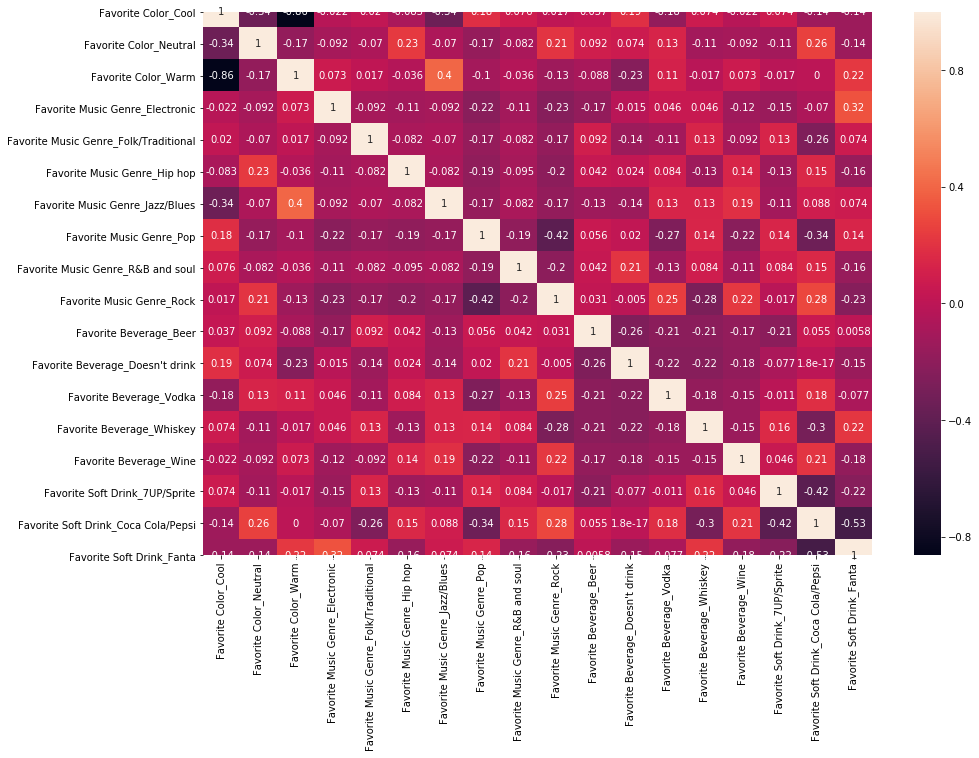

In [15]:
plt.figure(figsize=(15,10))

sns.heatmap(gender_train.corr(), annot=True)